# MiniProject. Old or new movies: preferences depending of movie genre
## Part 1
### Are any movie genres generally more highly rated than others and is this difference the same for the old and the new movies?

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#I have chosen IMDB Movie Dataset
movies = pd.read_csv('../Week-4-Pandas/movielens/movies.csv', sep=',')
ratings = pd.read_csv('../Week-4-Pandas/movielens/ratings.csv', sep=',', parse_dates=['timestamp'])

In [3]:
#First of all, initial exploring the data
print(movies.head(10))
print('...')
print(ratings.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Action|Crime|Thriller  
6                               Comedy|Romance  
7                           Adventure|Children  
8       

In [4]:
#cleaning the data - delete the column, which is useless in this analysis
del ratings['timestamp']

In [5]:
#calculating the average raitngs for the movie and deleting the useless now column
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [6]:
#collecting our data together and extracting the year of movie release
data = movies.merge(avg_ratings, on='movieId', how='inner')
data['year'] = data['title'].str.extract('.*\((.*)\).*', expand=True)
data.head()

,movieId,title,genres,rating,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,1995
4,5,Father of the Bride Part II (1995),Comedy,3.064592,1995


*For further analysis we should remove NaN from our data frame*

In [7]:
data.shape

(26744, 5)

In [8]:
data.isnull().any()

movieId    False
title      False
genres     False
rating     False
year        True
dtype: bool

In [9]:
data = data.dropna()

In [10]:
data.shape

(26727, 5)

In [11]:
data.isnull().any()

movieId    False
title      False
genres     False
rating     False
year       False
dtype: bool

In [12]:
#removing the nondigit strings from column "year'
mask_digit = data['year'].str.isdigit()
data = data[mask_digit]

In [13]:
#transforming years of movie release (column 'year') from string to int
data['year'] = pd.to_numeric(data['year'])

*Now I would like to determine the unique genres which are present in our data*

In [14]:
movie_genres = movies['genres'].str.split('|', expand=True)
movie_genres = movie_genres.fillna(movie_genres[0][0])
movie_genres.head()


,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,Adventure,Adventure,Adventure,Adventure,Adventure
1,Adventure,Children,Fantasy,Adventure,Adventure,Adventure,Adventure,Adventure,Adventure,Adventure
2,Comedy,Romance,Adventure,Adventure,Adventure,Adventure,Adventure,Adventure,Adventure,Adventure
3,Comedy,Drama,Romance,Adventure,Adventure,Adventure,Adventure,Adventure,Adventure,Adventure
4,Comedy,Adventure,Adventure,Adventure,Adventure,Adventure,Adventure,Adventure,Adventure,Adventure


In [15]:
movie_genres = np.array(movie_genres)
movie_genres_unique = np.unique(movie_genres)
len(movie_genres_unique)
movie_genres_unique


array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype=object)

*I have chosen 5 different movie genres to compare their ratings and to analyze the dynamics of their changes: Fantasy, Action, Children, Horror and Romance*

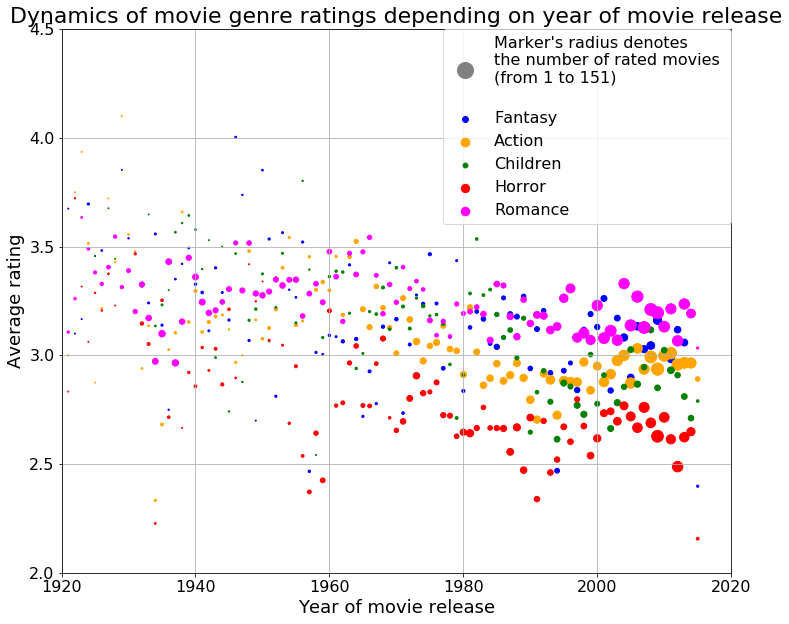

In [16]:
# 'Fantasy'

#extracting the genre
mask_fantasy = data['genres'].str.contains('Fantasy')
f = data[mask_fantasy]
#calculating the average rating by year of movie release for this genre
avg_by_year_f = f.groupby('year', as_index=False).mean()
del avg_by_year_f['movieId']
#calculating the number rated movies with this year of release for this genre
area_f = f.groupby('year').count()
avg_by_year_f['count'] = area_f['rating'].values

#plotting the scatter for selected genre rating depending on year of movie release
#in this scatter marker's radius denotes the number of rated movies
fig = plt.figure(figsize=(12, 10))
plt.scatter(avg_by_year_f['year'].values, avg_by_year_f['rating'].values, s = avg_by_year_f['count'].values, c = 'blue', label= movie_genres_unique[9])

# 'Action'
mask_genre1 = data['genres'].str.contains(movie_genres_unique[1])
act = data[mask_genre1]
avg_by_year_act = act.groupby('year', as_index=False).mean()
del avg_by_year_act['movieId']
area_act = act.groupby('year').count()
avg_by_year_act['count'] = area_act['rating'].values

plt.scatter(avg_by_year_act['year'].values, avg_by_year_act['rating'].values, s = avg_by_year_act['count'].values, c = 'orange', label= movie_genres_unique[1])

# 'Children'
mask_genre4 = data['genres'].str.contains(movie_genres_unique[4])
child = data[mask_genre4]
avg_by_year_child = child.groupby('year', as_index=False).mean()
del avg_by_year_child['movieId']
area_child = child.groupby('year').count()
avg_by_year_child['count'] = area_child['rating'].values

plt.scatter(avg_by_year_child['year'].values, avg_by_year_child['rating'].values, s = avg_by_year_child['count'].values, c = 'green', label= movie_genres_unique[4])

# 'Horror'
mask_genre11 = data['genres'].str.contains(movie_genres_unique[11])
hor = data[mask_genre11]
avg_by_year_hor = hor.groupby('year', as_index=False).mean()
del avg_by_year_hor['movieId']
area_hor = hor.groupby('year').count()
avg_by_year_hor['count'] = area_hor['rating'].values

plt.scatter(avg_by_year_hor['year'].values, avg_by_year_hor['rating'].values, s = avg_by_year_hor['count'].values, c = 'red', label= movie_genres_unique[11])

# 'Romance'
mask_genre15 = data['genres'].str.contains(movie_genres_unique[15])
rom = data[mask_genre15]
avg_by_year_rom = rom.groupby('year', as_index=False).mean()
del avg_by_year_rom['movieId']
area_rom = rom.groupby('year').count()
avg_by_year_rom['count'] = area_rom['rating'].values

plt.scatter(avg_by_year_rom['year'].values, avg_by_year_rom['rating'].values, s = avg_by_year_rom['count'].values,  c = 'magenta', label= movie_genres_unique[15])
plt.plot([], [], ' ', label="Marker's radius denotes \nthe number of rated movies \n(from 1 to 151)\n", marker = 'o', markersize = 16, color = 'grey')

plt.xlabel('Year of movie release', size = 18)
plt.ylabel('Average rating', size = 18)
plt.title('Dynamics of movie genre ratings depending on year of movie release', fontsize = 22)
plt.axis([1920, 2020, 2, 4.5])
plt.grid(True)
plt.legend(loc=1, borderaxespad=0., fontsize = 16)

plt.tick_params(labelsize = 16)

fig.savefig('figure_genres_dynamics.png', bbox_inches = 'tight')

*calculating the limits of rated movies number for all genres (to determine the limits of marker's radius)* 

In [19]:
min(min(avg_by_year_f['count'].values), 
    min(avg_by_year_act['count'].values), 
    min(avg_by_year_child['count'].values),  
    min(avg_by_year_hor['count'].values), 
    min(avg_by_year_rom['count'].values))

1

In [20]:
max(max(avg_by_year_f['count'].values), 
    max(avg_by_year_act['count'].values), 
    max(avg_by_year_child['count'].values),  
    max(avg_by_year_hor['count'].values), 
    max(avg_by_year_rom['count'].values))

151

*Gathering all average ratings for all genres in one data frame*

In [18]:
avg_by_year_f['Fantasy'] = avg_by_year_f['rating'].values
del avg_by_year_f['rating']
del avg_by_year_f['count']

avg_by_year_act['Action'] = avg_by_year_act['rating'].values
del avg_by_year_act['rating']
del avg_by_year_act['count']

avg_by_year_child['Children'] = avg_by_year_child['rating'].values
del avg_by_year_child['rating']
del avg_by_year_child['count']

avg_by_year_hor['Horror'] = avg_by_year_hor['rating'].values
del avg_by_year_hor['rating']
del avg_by_year_hor['count']

avg_by_year_rom['Romance'] = avg_by_year_rom['rating'].values
del avg_by_year_rom['rating']
del avg_by_year_rom['count']


all_genres = avg_by_year_f.merge(avg_by_year_act, on='year', how='inner')
all_genres = all_genres.merge(avg_by_year_child, on='year', how='inner')
all_genres = all_genres.merge(avg_by_year_hor, on='year', how='inner')
all_genres = all_genres.merge(avg_by_year_rom, on='year', how='inner')

all_genres.head()

,year,Fantasy,Action,Children,Horror,Romance
0,1925,3.456522,2.875000,3.456522,3.287591,3.381291
1,1933,3.241077,3.136116,3.647959,3.052235,3.171948
2,1934,3.558431,2.333183,3.135447,2.226950,2.972512
3,1935,3.138830,2.682162,3.232108,3.253332,3.099587
4,1936,2.750000,3.026257,3.300000,2.715597,3.430805


In [19]:
#calculating the correlation of movie genres with year of movie release 
print(all_genres.loc[:, all_genres.columns[1:]].corrwith(all_genres.loc[:,'year']))

Fantasy    -0.348374
Action     -0.427149
Children   -0.504355
Horror     -0.547531
Romance    -0.439541
dtype: float64


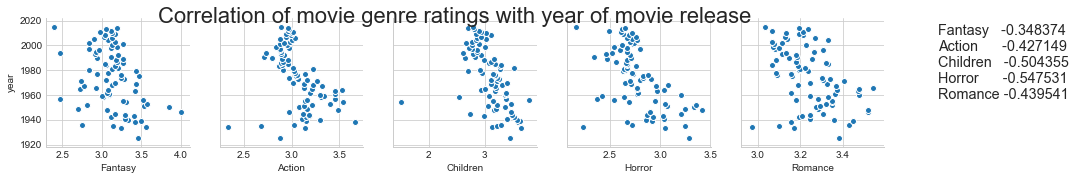

In [20]:
#plotting the correlation of movie genres with year of movie release using Seaborn pairplot
sns.set_style("whitegrid")
fig_corr = sns.pairplot(all_genres, x_vars=['Fantasy', 'Action', 'Children', 'Horror', 'Romance'], y_vars=['year'])
plt.suptitle('Correlation of movie genre ratings with year of movie release', fontsize = 22)
plt.plot([], [], ' ', label="Fantasy   -0.348374 \nAction      -0.427149 \nChildren   -0.504355 \nHorror      -0.547531 \nRomance -0.439541")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 'x-large')

fig_corr.savefig('correlation.png', orientation = 'landscape', bbox_inches = 'tight')

In [21]:
#extracting "old"  movies (1920 - 1940) and "new" movies (2000-2015) 
all_genres_2000 = all_genres[(all_genres['year'] >= 2000) & (all_genres['year'] < 2015)]
del all_genres_2000['year']
all_genres_1920_1940 = all_genres[(all_genres['year'] >= 1920) & (all_genres['year'] < 1940)]
del all_genres_1920_1940['year']

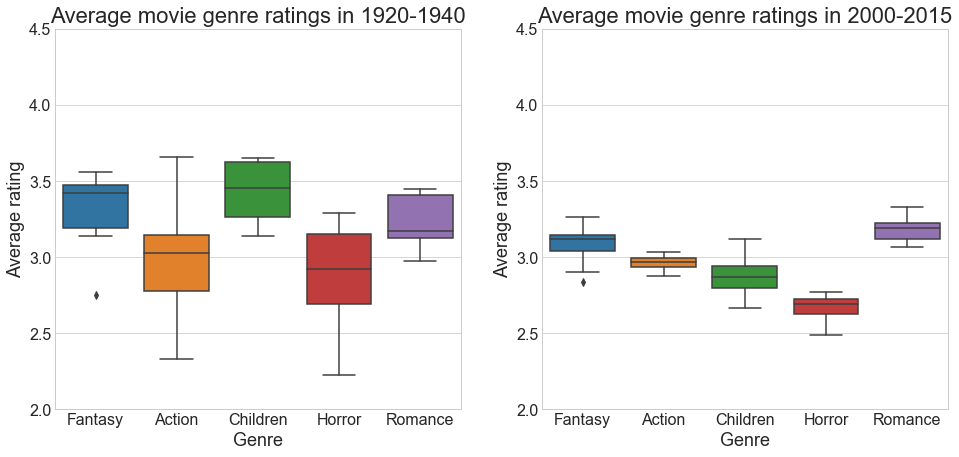

In [23]:
#plotting the Seaborn boxplot to compare "new" movies genres ratings with "old" ones
fig1 = plt.figure(figsize=(16, 7))

plt.subplot(1,2,1)
sns.set_style("whitegrid")
sns.boxplot(data = all_genres_1920_1940)
plt.title('Average movie genre ratings in 1920-1940', fontsize = 22)
plt.axis([-0.5, 4.5, 2, 4.5])
plt.ylabel('Average rating', fontsize = 18)
plt.xlabel('Genre', fontsize = 18)
plt.tick_params(labelsize = 16)

plt.subplot(1,2,2)
sns.set_style("whitegrid")
sns.boxplot(data = all_genres_2000)
plt.title('Average movie genre ratings in 2000-2015', fontsize = 22)
plt.axis([-0.5, 4.5, 2, 4.5])
plt.ylabel('Average rating', fontsize = 18)
plt.xlabel('Genre', fontsize = 18)
plt.tick_params(labelsize = 16)

fig1.savefig('figure_genres_average_boxplots.png', bbox_inches = 'tight')

## Part 2
### Do genre preferences depend on the year, during which the movie was rated?

In [24]:
movies = pd.read_csv('../Week-4-Pandas/movielens/movies.csv', sep=',')
ratings = pd.read_csv('../Week-4-Pandas/movielens/ratings.csv', sep=',', parse_dates=['timestamp'])

In [25]:
#merging movies and ratings
data = movies.merge(ratings, on='movieId', how='inner')
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821


In [26]:
#removing useless here data and modifying the timestamps format from Unix time to datetime
del data['movieId']
del data['userId']
del data['title']
data['parsed_time'] = pd.to_datetime(data['timestamp'], unit='s')
del data['timestamp']
data.head()

,genres,rating,parsed_time
0,Adventure|Animation|Children|Comedy|Fantasy,4.0,1999-12-11 13:36:47
1,Adventure|Animation|Children|Comedy|Fantasy,5.0,1997-03-13 17:50:52
2,Adventure|Animation|Children|Comedy|Fantasy,4.0,1996-06-05 13:37:51
3,Adventure|Animation|Children|Comedy|Fantasy,4.0,1999-11-25 02:44:47
4,Adventure|Animation|Children|Comedy|Fantasy,4.5,2009-01-02 01:13:41


In [27]:
data.shape

(20000263, 3)

In [28]:
#extracting the year, during which the movie was rated
data['year_rating'] = pd.DatetimeIndex(data['parsed_time']).year
del data['parsed_time']
data.head()

,genres,rating,year_rating
0,Adventure|Animation|Children|Comedy|Fantasy,4.0,1999
1,Adventure|Animation|Children|Comedy|Fantasy,5.0,1997
2,Adventure|Animation|Children|Comedy|Fantasy,4.0,1996
3,Adventure|Animation|Children|Comedy|Fantasy,4.0,1999
4,Adventure|Animation|Children|Comedy|Fantasy,4.5,2009


In [32]:
#again determining the unique genres which are present in our data
movie_genres = movies['genres'].str.split('|', expand=True)
movie_genres = movie_genres.fillna(movie_genres[0][0])

movie_genres = np.array(movie_genres)
movie_genres_unique = np.unique(movie_genres)

movie_genres_unique

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype=object)

*Plotting the timecourse of movie genre ratings and of movie ratings number depending on year of rating (from 1996 to 2015)*

C:\Users\Olga\AppData\Local\conda\conda\envs\py36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


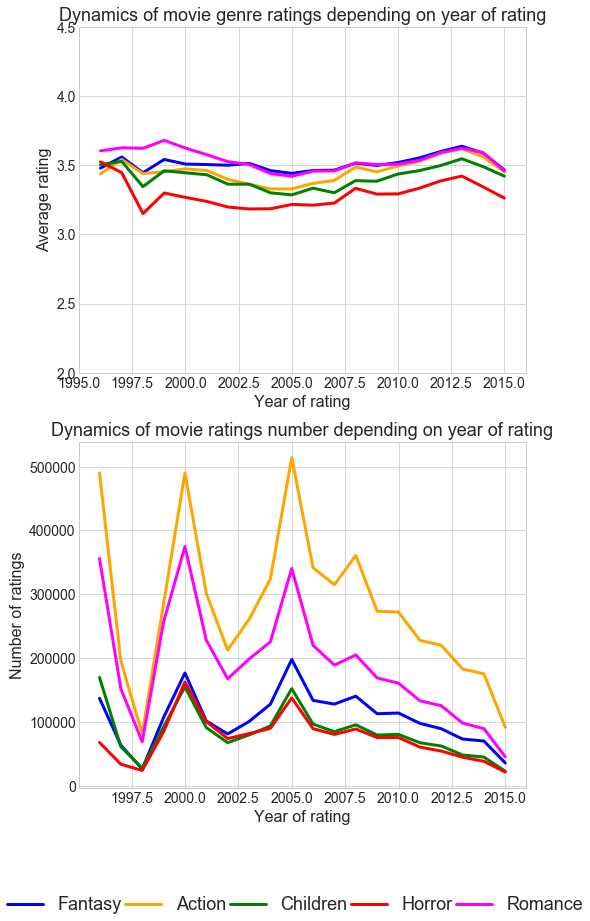

In [33]:
# 'Fantasy'
mask_fantasy = data['genres'].str.contains('Fantasy')
f = data[mask_fantasy]
avg_by_year_rating_f = f.groupby('year_rating', as_index=False).mean()
area_f = f.groupby('year_rating').count()
avg_by_year_rating_f['count'] = area_f['rating'].values
avg_by_year_rating_f = avg_by_year_rating_f[avg_by_year_rating_f['count'] > 10000]

figR = plt.figure(figsize=(8, 14))

plt.subplot(2,1,1)
plt.plot(avg_by_year_rating_f['year_rating'].values, avg_by_year_rating_f['rating'].values, c = 'blue', lw=3) 
plt.title('Dynamics of movie genre ratings depending on year of rating', fontsize = 18)
plt.xlabel('Year of rating', size = 16)
plt.ylabel('Average rating', size = 16)
plt.axis([1995, 2016, 2, 4.5])
plt.grid(True)
plt.tick_params(labelsize = 14)

plt.subplot(2,1,2)
plt.plot(avg_by_year_rating_f['year_rating'].values, avg_by_year_rating_f['count'].values, color = 'blue', lw=3, label= movie_genres_unique[9])
plt.title('Dynamics of movie ratings number depending on year of rating', fontsize = 18)
plt.xlabel('Year of rating', size = 16)
plt.ylabel('Number of ratings', size = 16)
plt.grid(True)
plt.tick_params(labelsize = 14)


# 'Action'
mask_genre1 = data['genres'].str.contains(movie_genres_unique[1])
act = data[mask_genre1]
avg_by_year_rating_act = act.groupby('year_rating', as_index=False).mean()
area_act = act.groupby('year_rating').count()
avg_by_year_rating_act['count'] = area_act['rating'].values
avg_by_year_rating_act = avg_by_year_rating_act[avg_by_year_rating_act['count'] > 10000]

plt.subplot(2,1,1)
plt.plot(avg_by_year_rating_act['year_rating'].values, avg_by_year_rating_act['rating'].values, c = 'orange', lw=3) 
plt.subplot(2,1,2)
plt.plot(avg_by_year_rating_act['year_rating'].values, avg_by_year_rating_act['count'].values, color = 'orange', lw=3, label= movie_genres_unique[1])

# 'Children'
mask_genre4 = data['genres'].str.contains(movie_genres_unique[4])
child = data[mask_genre4]
avg_by_year_rating_child = child.groupby('year_rating', as_index=False).mean()
area_child = child.groupby('year_rating').count()
avg_by_year_rating_child['count'] = area_child['rating'].values
avg_by_year_rating_child = avg_by_year_rating_child[avg_by_year_rating_child['count'] > 10000]

plt.subplot(2,1,1)
plt.plot(avg_by_year_rating_child['year_rating'].values, avg_by_year_rating_child['rating'].values, c = 'green', lw=3) 
plt.subplot(2,1,2)
plt.plot(avg_by_year_rating_child['year_rating'].values, avg_by_year_rating_child['count'].values, color = 'green', lw=3, label= movie_genres_unique[4])

## 'Horror'
mask_genre11 = data['genres'].str.contains(movie_genres_unique[11])
hor = data[mask_genre11]
avg_by_year_rating_hor = hor.groupby('year_rating', as_index=False).mean()
area_hor = hor.groupby('year_rating').count()
avg_by_year_rating_hor['count'] = area_hor['rating'].values
avg_by_year_rating_hor = avg_by_year_rating_hor[avg_by_year_rating_hor['count'] > 10000]

plt.subplot(2,1,1)
plt.plot(avg_by_year_rating_hor['year_rating'].values, avg_by_year_rating_hor['rating'].values, c = 'red', lw=3) 
plt.subplot(2,1,2)
plt.plot(avg_by_year_rating_hor['year_rating'].values, avg_by_year_rating_hor['count'].values, color = 'red', lw=3, label= movie_genres_unique[11])

# 'Romance'
mask_genre15 = data['genres'].str.contains(movie_genres_unique[15])
rom = data[mask_genre15]
avg_by_year_rating_rom = rom.groupby('year_rating', as_index=False).mean()
area_rom = rom.groupby('year_rating').count()
avg_by_year_rating_rom['count'] = area_rom['rating'].values
avg_by_year_rating_rom = avg_by_year_rating_rom[avg_by_year_rating_rom['count'] > 10000]

plt.subplot(2,1,1)
plt.plot(avg_by_year_rating_rom['year_rating'].values, avg_by_year_rating_rom['rating'].values, c = 'magenta', lw=3) 
plt.subplot(2,1,2)
plt.plot(avg_by_year_rating_rom['year_rating'].values, avg_by_year_rating_rom['count'].values, color = 'magenta', lw=3, label= movie_genres_unique[15])

figR.legend(loc=3, ncol=5, mode="expand", borderaxespad=0., fontsize = 18) 

figR.savefig('figure_genres_dynamics_year_of_rating.png', bbox_inches = 'tight')